In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
path = '../utils/weather.csv'
weather = pd.read_csv(path)

In [45]:
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [46]:
df = weather.drop(columns = ['WindDir9am', 'WindDir3pm', 'RainToday', 'WindGustDir'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustSpeed  364 non-null    float64
 6   WindSpeed9am   359 non-null    float64
 7   WindSpeed3pm   366 non-null    int64  
 8   Humidity9am    366 non-null    int64  
 9   Humidity3pm    366 non-null    int64  
 10  Pressure9am    366 non-null    float64
 11  Pressure3pm    366 non-null    float64
 12  Cloud9am       366 non-null    int64  
 13  Cloud3pm       366 non-null    int64  
 14  Temp9am        366 non-null    float64
 15  Temp3pm        366 non-null    float64
 16  RISK_MM        366 non-null    float64
 17  RainTomorrow   366 non-null    object 
dtypes: float64

In [47]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


/home/gauri/Data/ML/gauri_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


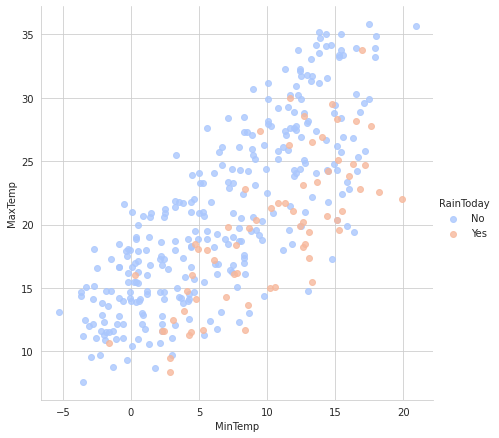

In [36]:
sb.set_style('whitegrid')
sb.lmplot('MinTemp','MaxTemp',data=weather, hue='RainToday', palette='coolwarm',height=6,aspect=1,fit_reg=False)

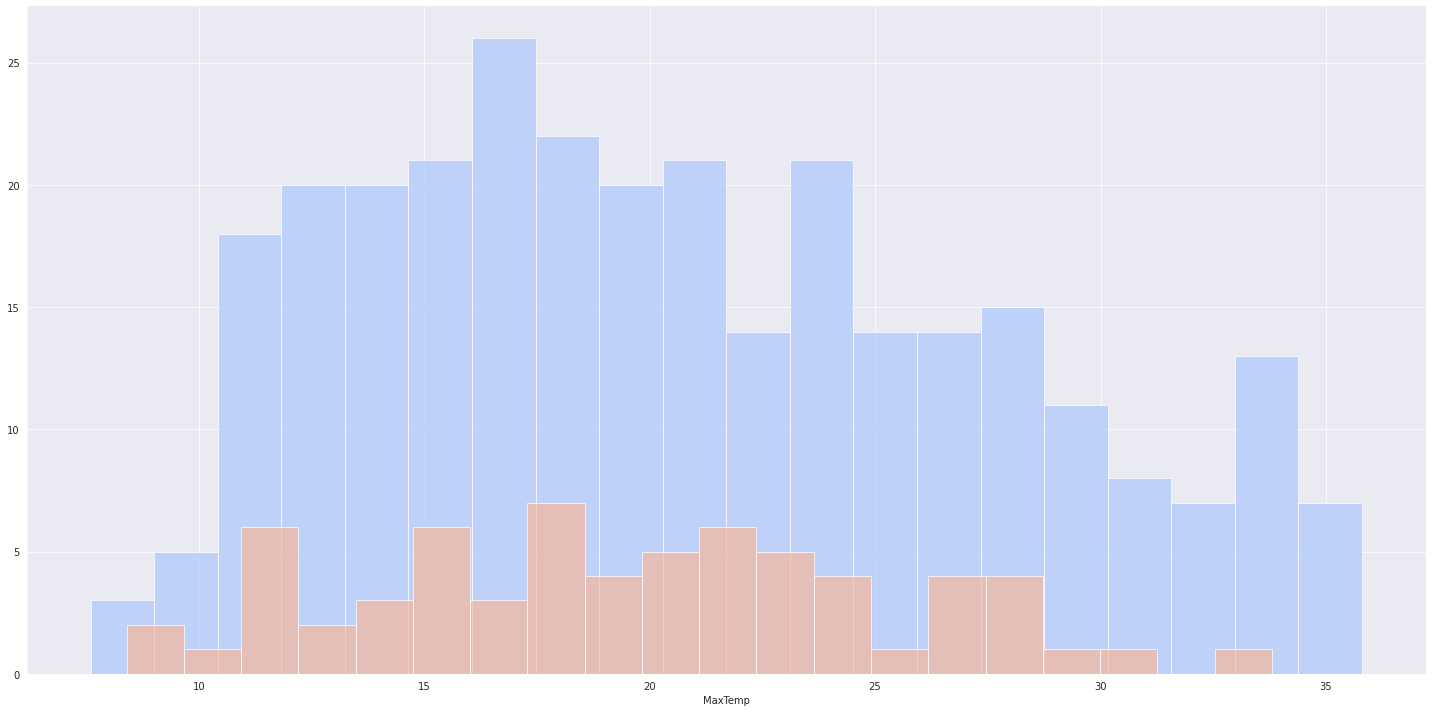

In [37]:
sb.set_style('darkgrid')
g = sb.FacetGrid(weather, hue = 'RainToday', palette = 'coolwarm', height = 10, aspect = 2)
g = g.map(plt.hist, 'MaxTemp', bins = 20, alpha = 0.7)

In [38]:
weather[weather['MinTemp'] > 15].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
19,15.6,33.4,0.0,8.0,10.4,NE,33.0,NNW,NNW,2.0,...,27,1018.5,1013.7,0,1,22.8,32.0,No,0.0,No
20,15.3,33.4,0.0,8.8,9.5,WNW,59.0,N,NW,2.0,...,26,1012.4,1006.5,1,5,22.2,32.8,No,0.4,No
21,16.4,19.4,0.4,9.2,0.0,E,26.0,ENE,E,6.0,...,72,1010.7,1008.9,8,8,16.5,18.3,No,25.8,Yes
24,15.4,28.4,0.0,4.4,8.1,ENE,33.0,SSE,NE,9.0,...,31,1022.4,1018.6,8,2,16.8,27.3,No,0.0,No
25,15.6,26.9,0.0,6.8,8.9,E,41.0,E,E,6.0,...,48,1019.7,1016.5,2,4,19.8,25.1,No,0.2,No


In [48]:
kmeans = KMeans(n_clusters=2)

In [40]:
# cols_to_use = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', ]
# # 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']
# df = weather[cols_to_use]
# df.describe()

In [49]:
df.dropna(inplace = True)
kmeans.fit(df.drop('RainTomorrow',axis=1))

KMeans(n_clusters=2)

In [50]:
kmeans.cluster_centers_

array([[9.13785311e+00, 2.46593220e+01, 8.04519774e-01, 5.95141243e+00,
        1.01638418e+01, 4.29039548e+01, 9.57627119e+00, 1.85819209e+01,
        6.41016949e+01, 3.23728814e+01, 1.01871130e+03, 1.01542486e+03,
        2.54802260e+00, 3.12429379e+00, 1.50898305e+01, 2.33768362e+01,
        7.16384181e-01],
       [5.58700565e+00, 1.65435028e+01, 2.03728814e+00, 3.16497175e+00,
        5.68700565e+00, 3.71186441e+01, 9.75706215e+00, 1.74463277e+01,
        7.96497175e+01, 5.65367232e+01, 1.02041299e+03, 1.01795932e+03,
        5.29378531e+00, 4.91525424e+00, 9.78757062e+00, 1.51661017e+01,
        2.18079096e+00]])

In [58]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0
df['Cluster'] = df['RainTomorrow'].apply(converter)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow,Cluster
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,3.6,Yes,1
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,3.6,Yes,1
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,39.8,Yes,1
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,2.8,Yes,1
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,0.0,No,0


In [59]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

# Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.
# Precision:- Accuracy of positive predictions.

# Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
# Recall:- Fraction of positives that were correctly identified.

[[154 136]
 [ 23  41]]
              precision    recall  f1-score   support

           0       0.87      0.53      0.66       290
           1       0.23      0.64      0.34        64

    accuracy                           0.55       354
   macro avg       0.55      0.59      0.50       354
weighted avg       0.75      0.55      0.60       354

